# 📝 Exercise M6.03

The aim of this exercise is to:

* verifying if a random forest or a gradient-boosting decision tree overfit if
  the number of estimators is not properly chosen;
* use the early-stopping strategy to avoid adding unnecessary trees, to get
  the best generalization performances.

We use the California housing dataset to conduct our experiments.

In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

data, target = fetch_california_housing(return_X_y=True, as_frame=True)
target *= 100  # rescale the target in k$
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0, test_size=0.5
)

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

Create a gradient boosting decision tree with `max_depth=5` and
`learning_rate=0.5`.

In [9]:
# Write your code here.
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    max_depth=5, 
    learning_rate=0.5
)



Also create a random forest with fully grown trees by setting `max_depth=None`.

In [10]:
# Write your code here.
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=None)


For both the gradient-boosting and random forest models, create a validation
curve using the training set to assess the impact of the number of trees on
the performance of each model. Evaluate the list of parameters `param_range =
np.array([1, 2, 5, 10, 20, 50, 100])` and use the mean absolute error.

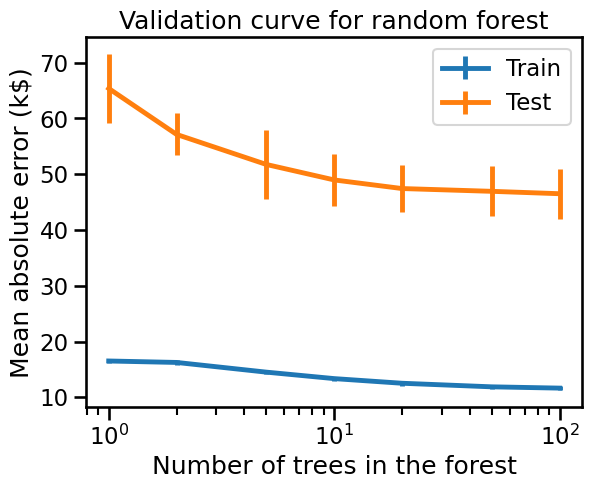

In [11]:
# Write your code here.
import numpy as np
#from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import ValidationCurveDisplay

param_range = np.array([1, 2, 5, 10, 20, 50, 100])

disp = ValidationCurveDisplay.from_estimator(
    rf,
    data,
    target,
    param_name="n_estimators",
    param_range=param_range,
    scoring="neg_mean_absolute_error",
    negate_score=True,
    std_display_style="errorbar",
    n_jobs=2,
)

_ = disp.ax_.set(
    xlabel="Number of trees in the forest",
    ylabel="Mean absolute error (k$)",
    title="Validation curve for random forest",
)


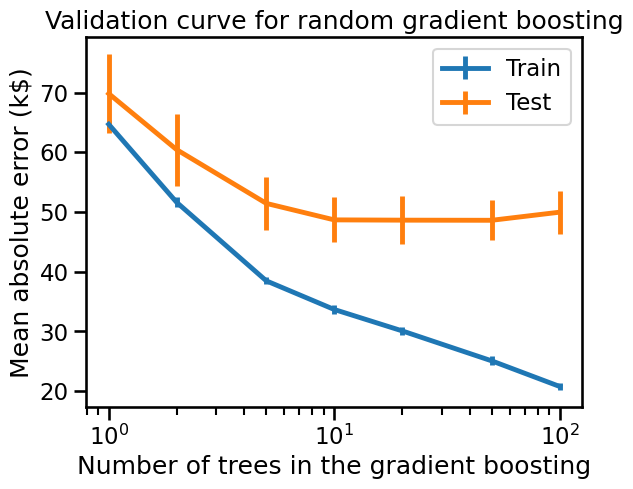

In [12]:
disp = ValidationCurveDisplay.from_estimator(
    gbr,
    data,
    target,
    param_name="n_estimators",
    param_range=param_range,
    scoring="neg_mean_absolute_error",
    negate_score=True,
    std_display_style="errorbar",
    n_jobs=2,
)

_ = disp.ax_.set(
    xlabel="Number of trees in the gradient boosting",
    ylabel="Mean absolute error (k$)",
    title="Validation curve for random gradient boosting",
)

Both gradient boosting and random forest models improve when increasing the
number of trees in the ensemble. However, the scores reach a plateau where
adding new trees just makes fitting and scoring slower.

To avoid adding new unnecessary tree, unlike random-forest gradient-boosting
offers an early-stopping option. Internally, the algorithm uses an
out-of-sample set to compute the generalization performance of the model at
each addition of a tree. Thus, if the generalization performance is not
improving for several iterations, it stops adding trees.

Now, create a gradient-boosting model with `n_estimators=1_000`. This number
of trees is certainly too large. Change the parameter `n_iter_no_change` such
that the gradient boosting fitting stops after adding 5 trees that do not
improve the overall generalization performance.

In [13]:
# Write your code here.
gbr = GradientBoostingRegressor(n_estimators=1000, n_iter_no_change=5)
gbr.fit(data_train, target_train)
gbr.n_estimators_

296

Estimate the generalization performance of this model again using the
`sklearn.metrics.mean_absolute_error` metric but this time using the test set
that we held out at the beginning of the notebook. Compare the resulting value
with the values observed in the validation curve.

In [14]:
# Write your code here.
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(target_test, gbr.predict(data_test))
print(f"On average, our gradient boosting regressor makes an error of {error:.2f} k$")

On average, our gradient boosting regressor makes an error of 34.12 k$
